In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##  Donnees Enrégistrées
#racine="C:/Users/ALI ZATCHI Afzal/Documents/GitHub/ProjetPython-Immobilier/"
dFCopie=pd.read_csv(racine + "export_dataframe.csv")
dFCopie.head()

,Departement,Local,Price,Surf,Nb_Pieces,Nb_Chambres,Description
0,94130.0,Nogent-Sur-Marne,655000.0,87.0,4.0,2,"A 10 min du RER E, et à 15 min à pied du RER A..."
1,77500.0,Chelles,225000.0,62.0,3.0,2,"Beau 3 pièces très lumineux de 62, 08 m² expos..."
2,75016.0,Paris 16E,980000.0,86.0,4.0,2,Quartier bourgeois. Au calme. A proximité des ...
3,75012.0,Paris 12E,890000.0,80.0,4.0,2,"Quartier Daumesnil/Dugommier, à proximité de t..."
4,75019.0,Paris 19E,298000.0,NaN,1.0,30m2,"Studio 30 m², refait à neuf ! cuisine séparée,..."


In [4]:
dFCopie.shape

(6795, 7)

In [ ]:
# We have to find a way to include pictures links in our dataFrame,
#for the instance, the way i started by putting the links in a list is complicating things
# If you have new ideas, your welcome

# Eviter aussi de faire tourner le code d'extraction à chaque fois.
# Travailler avec la partie

### Suppression des doublons

In [5]:
#Suppression des lignes dupliquées
dfCleanParis=dFCopie[~dFCopie.duplicated()]
dfCleanParis.shape

(649, 7)

In [7]:
# Suppression des lignes incomplètes
dfClean=dfCleanParis[~dfCleanParis. isnull().any(axis=1)]
dfClean.shape

(487, 7)

In [8]:
dfClean

,Departement,Local,Price,Surf,Nb_Pieces,Nb_Chambres,Description
0,94130.0,Nogent-Sur-Marne,655000.0,87.0,4.0,2,"A 10 min du RER E, et à 15 min à pied du RER A..."
1,77500.0,Chelles,225000.0,62.0,3.0,2,"Beau 3 pièces très lumineux de 62, 08 m² expos..."
2,75016.0,Paris 16E,980000.0,86.0,4.0,2,Quartier bourgeois. Au calme. A proximité des ...
3,75012.0,Paris 12E,890000.0,80.0,4.0,2,"Quartier Daumesnil/Dugommier, à proximité de t..."
6,77120.0,Coulommiers,117000.0,36.0,2.0,1,A 30 min de Meaux en voiture et 20 min de La F...
...,...,...,...,...,...,...,...
6526,75012.0,Paris 12E,535000.0,52.0,3.0,2,"Quartier Picpus, à deux pas de Bercy. A 2 min ..."
6617,75013.0,Paris 13E,499000.0,50.0,2.0,1,Quartier Croulebarbe. Au pied des lignes de bu...
6675,75019.0,Paris 19E,399000.0,34.0,2.0,1,Beau 2 pièces de 34 m² idéalement situé à une ...
6706,94550.0,Chevilly-Larue,650000.0,120.0,5.0,3,"Entre appartement et maison, rare sur le march..."


In [9]:
dfClean.dtypes

Departement    float64
Local           object
Price          float64
Surf           float64
Nb_Pieces      float64
Nb_Chambres     object
Description     object
dtype: object

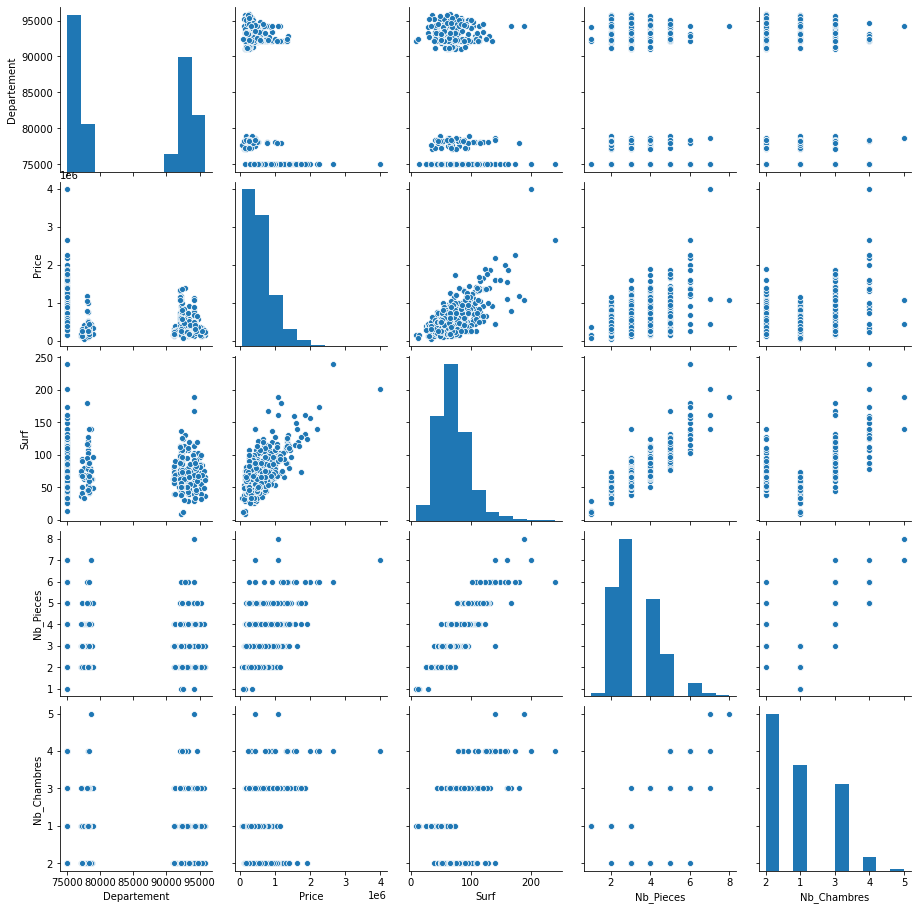

In [10]:
sns.pairplot(dfClean)

In [20]:
dfClean['LogPrice']=np.log(dfClean.Price)

C:\Users\ALI ZATCHI Afzal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data=dfClean

In [23]:
data.describe()

,Departement,Price,Surf,Nb_Pieces,LogPrice
count,487.000000,4.870000e+02,487.000000,487.000000,487.000000
mean,84037.542094,5.959763e+05,71.694045,3.279261,13.085495
std,8747.449398,4.160388e+05,28.680352,1.124018,0.663432
min,75002.000000,4.700000e+04,9.000000,1.000000,10.757903
25%,75016.000000,2.950000e+05,52.000000,2.000000,12.594731
50%,78420.000000,4.950000e+05,67.000000,3.000000,13.112313
75%,92510.000000,7.700000e+05,85.000000,4.000000,13.554146
max,95870.000000,3.990000e+06,240.000000,8.000000,15.199302


In [26]:
import scipy as sp

skewness: -0.117486
kurtosis: -0.251474


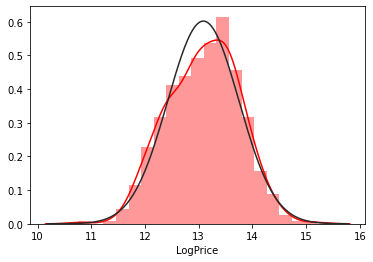

In [27]:
sns.distplot(data.LogPrice,fit=sp.stats.norm,color='red')
print("skewness: %f" % data.LogPrice.skew())
print("kurtosis: %f" % data.LogPrice.kurt())

In [ ]:
# Légèrement Asymétrique à droite

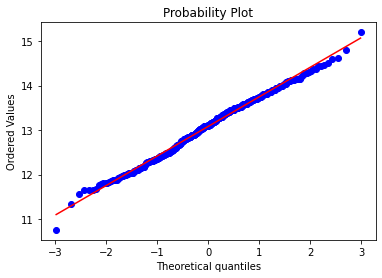

NormaltestResult(statistic=2.6147408234277147, pvalue=0.27053050572957926)


In [31]:
sp.stats.probplot(data.LogPrice,plot=plt)
plt.show()
print(sp.stats.normaltest(data.LogPrice))

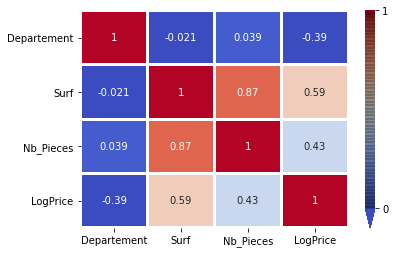

In [33]:
dataR=data.drop('Price',axis=1)
cbar_kws = {"orientation":"vertical", "shrink":1,'extend':'min', 
            'extendfrac':0.1, "ticks":np.arange(0,22), "drawedges":True} # 
hm = sns.heatmap(
    dataR.corr(),
    vmin=0,vmax=1, cmap="coolwarm", annot = True,
    linewidth = 2, cbar_kws=cbar_kws )
plt.show()

In [35]:
data.Departement.unique()

array([94130., 77500., 75016., 75012., 77120., 92210., 93260., 94270.,
       95130., 92200., 75005., 75013., 75008., 78200., 92600., 93190.,
       75018., 95350., 75020., 92190., 92160., 92310., 93160., 92300.,
       93330., 75004., 94190., 75017., 91370., 92100., 93400., 93300.,
       91380., 75007., 75010., 75019., 94000., 78120., 78100., 92130.,
       93140., 92800., 75003., 75014., 75015., 78240., 93100., 95300.,
       75011., 94500., 94220., 95760., 77700., 92420., 92340., 95310.,
       91000., 77200., 94160., 95000., 93390., 78000., 92120., 78700.,
       94230., 94800., 91170., 78470., 75006., 95870., 92150., 95220.,
       78110., 91190., 91200., 92700., 93170., 92290., 78310., 77340.,
       77600., 92000., 94320., 75009., 92400., 78440., 92140., 91220.,
       91540., 93200., 92320., 78150., 92250., 78420., 77290., 78590.,
       93340., 95100., 93130., 91600., 94600., 92170., 93420., 92330.,
       93500., 75002., 94100., 94170., 77620., 78380., 94200., 95260.,
      

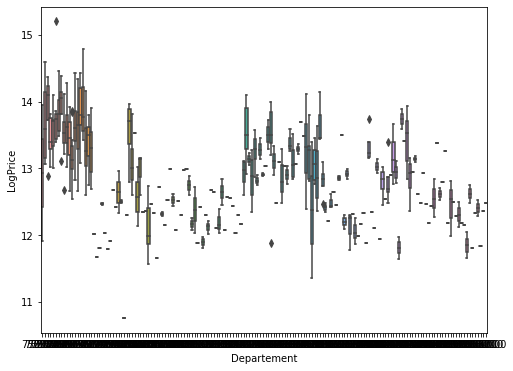

In [38]:
# Street / SalePrice
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="Departement", y='LogPrice', data=data)
#fig.axis(ymin=0, ymax=800000)
plt.show();